#PRACTICAL QUESTIONS


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
# Q1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results?

from scipy.stats import norm

def one_sample_z_test(sample, population_mean, population_std):
    sample_mean = np.mean(sample)
    n = len(sample)
    z = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p = 2 * (1 - norm.cdf(abs(z)))
    print(f"Z = {z:.4f}, P-value = {p:.4f}")
    if p < 0.05:
        print("Reject null hypothesis.")
    else:
        print("Fail to reject null hypothesis.")


In [4]:
one_sample_z_test([1,2,3,4,5],3,1)

Z = 0.0000, P-value = 1.0000
Fail to reject null hypothesis.


In [5]:
# Q2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python?

np.random.seed(42)
sample = np.random.normal(105, 15, 50)
one_sample_z_test(sample, population_mean=100, population_std=15)


Z = 0.7627, P-value = 0.4457
Fail to reject null hypothesis.


In [6]:
#Q3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean?

from scipy.stats import norm

def one_sample_z_test(sample_data, population_mean, population_std, alpha=0.05):
    n = len(sample_data)
    sample_mean = np.mean(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Z-Score: {z_score:.4f}")
    print(f"P-Value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference.")
    else:
        print("Fail to reject the null hypothesis: No significant difference.")

    return z_score, p_value

# Example usage
np.random.seed(42)
sample = np.random.normal(loc=102, scale=10, size=30)  # Simulated sample data
population_mean = 100
population_std = 10

one_sample_z_test(sample, population_mean, population_std)


Sample Mean: 100.12
Z-Score: 0.0649
P-Value: 0.9482
Fail to reject the null hypothesis: No significant difference.


(np.float64(0.06492212518844447), np.float64(0.9482360044010603))

In [7]:
#Q4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot?


def z_test_visual(sample, pop_mean, pop_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    print(f"Z = {z_score:.4f}, P = {p_value:.4f}")

    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x)

    plt.plot(x, y, label="Z-distribution")
    plt.fill_between(x, y, where=(x <= -1.96) | (x >= 1.96), color='red', alpha=0.3, label='Rejection Region')
    plt.axvline(z_score, color='blue', linestyle='--', label=f'Z = {z_score:.2f}')
    plt.title("Two-Tailed Z-Test")
    plt.legend()
    plt.grid(True)
    plt.show()

    return z_score, p_value


Z = 0.0000, P = 1.0000


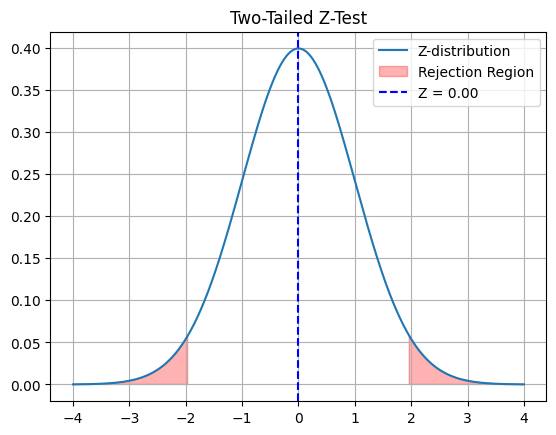

(np.float64(0.0), np.float64(1.0))

In [8]:
#example usage
z_test_visual([1,2,3,4,5],3,1)

In [9]:
#Q5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing?

def type1_type2_errors(mu0=100, mu1=105, sigma=10, n=30, alpha=0.05):
    se = sigma / np.sqrt(n)
    x = np.linspace(85, 115, 500)
    crit_val = norm.ppf(1 - alpha/2) * se

    plt.plot(x, norm.pdf(x, mu0, se), label='H0', color='blue')
    plt.plot(x, norm.pdf(x, mu1, se), label='H1', color='green')

    plt.fill_between(x, norm.pdf(x, mu0, se), where=(x < mu0 - crit_val) | (x > mu0 + crit_val),
                     color='red', alpha=0.3, label='Type I Error')
    plt.fill_between(x, norm.pdf(x, mu1, se), where=(x > mu0 - crit_val) & (x < mu0 + crit_val),
                     color='orange', alpha=0.3, label='Type II Error')
    plt.axvline(mu0 - crit_val, color='black', linestyle='--')
    plt.axvline(mu0 + crit_val, color='black', linestyle='--')
    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.grid(True)
    plt.show()


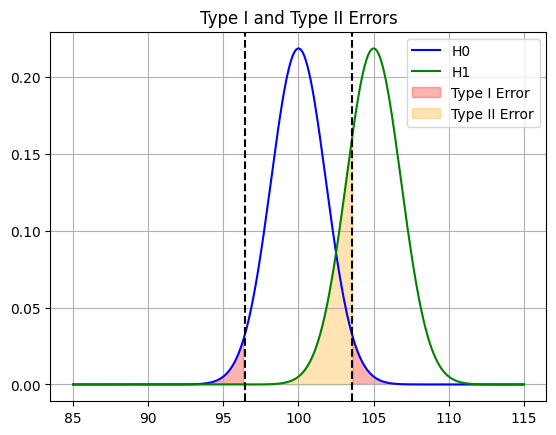

In [10]:
type1_type2_errors()

In [11]:
#Q6. Write a Python program to perform an independent T-test and interpret the results?

from scipy.stats import ttest_ind

group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(105, 10, 30)

t_stat, p_val = ttest_ind(group1, group2)
print(f"T = {t_stat:.4f}, P = {p_val:.4f}")
if p_val < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference.")


T = -2.5526, P = 0.0133
Reject null hypothesis: Means are significantly different.


T = -3.0575, P = 0.0048


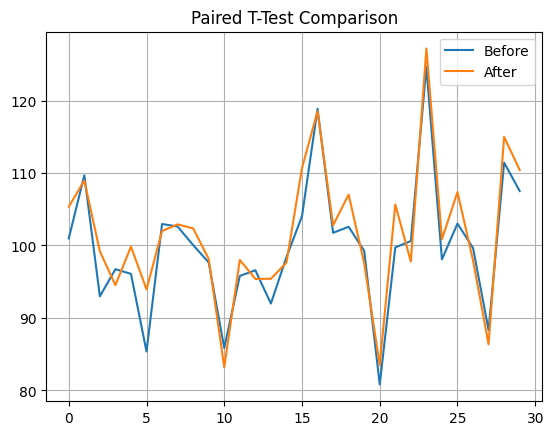

In [12]:
#Q7. Perform a paired sample T-test using Python and visualize the comparison results?

from scipy.stats import ttest_rel

before = np.random.normal(100, 10, 30)
after = before + np.random.normal(2, 3, 30)

t_stat, p_val = ttest_rel(before, after)
print(f"T = {t_stat:.4f}, P = {p_val:.4f}")

# Visualization
plt.plot(before, label='Before')
plt.plot(after, label='After')
plt.legend()
plt.title("Paired T-Test Comparison")
plt.grid(True)
plt.show()


In [13]:
#Q8. Simulate data and perform both Z-test and T-test, then compare the results using Python?

from scipy.stats import ttest_1samp

sample = np.random.normal(102, 10, 25)
pop_mean = 100
pop_std = 10

# Z-test
z = (np.mean(sample) - pop_mean) / (pop_std / np.sqrt(len(sample)))
p_z = 2 * (1 - norm.cdf(abs(z)))

# T-test
t_stat, p_t = ttest_1samp(sample, pop_mean)

print(f"Z-test: Z = {z:.4f}, P = {p_z:.4f}")
print(f"T-test: T = {t_stat:.4f}, P = {p_t:.4f}")


Z-test: Z = 1.7229, P = 0.0849
T-test: T = 2.0136, P = 0.0554


In [14]:
#9 Write a Python function to calculate the confidence interval for a sample mean and explain its significance?
#Ans 9:

from scipy.stats import t

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)
    margin = sem * t.ppf((1 + confidence) / 2., n-1)
    ci = (mean - margin, mean + margin)
    print(f"{int(confidence*100)}% Confidence Interval: {ci}")
    return ci

    #Significance:
#A confidence interval gives a range in which the true population mean likely lies. A 95% confidence interval means that if we repeated the sampling process many times, 95% of the intervals would contain the true mean.



In [15]:
confidence_interval([1,2,3,4,5])

95% Confidence Interval: (np.float64(1.036756838522439), np.float64(4.9632431614775605))


(np.float64(1.036756838522439), np.float64(4.9632431614775605))

In [16]:
#10  Write a Python program to calculate the margin of error for a given confidence level using sample data?

def margin_of_error(data, confidence=0.95):
    n = len(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    z = norm.ppf((1 + confidence) / 2)
    moe = z * std_err
    print(f"Margin of Error ({confidence*100:.0f}%): {moe:.4f}")
    return moe


In [17]:
margin_of_error([1,2,3,4,5])

Margin of Error (95%): 1.3859


np.float64(1.385903824349678)

In [18]:
#11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process?

def bayes_theorem(prior_A, likelihood_B_given_A, prior_not_A, likelihood_B_given_not_A):
    numerator = likelihood_B_given_A * prior_A
    denominator = numerator + likelihood_B_given_not_A * prior_not_A
    posterior = numerator / denominator
    print(f"Posterior probability P(A|B) = {posterior:.4f}")
    return posterior


In [19]:
bayes_theorem(0.5, 0.9, 0.5, 0.1)

Posterior probability P(A|B) = 0.9000


0.9

In [20]:
#12 Perform a Chi-square test for independence between two categorical variables in Python?

from scipy.stats import chi2_contingency

data = pd.DataFrame({'Male': [20, 15], 'Female': [30, 35]}, index=['Yes', 'No'])
chi2, p, dof, expected = chi2_contingency(data)
print(f"Chi2 = {chi2:.4f}, P-value = {p:.4f}")


Chi2 = 0.7033, P-value = 0.4017


In [22]:
#13 Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data?


def expected_frequencies(observed):
    _, _, _, expected = chi2_contingency(observed)
    print("Expected Frequencies:\n", expected)
    return expected


In [23]:
expected_frequencies([[1,2],[3,4]])

Expected Frequencies:
 [[1.2 1.8]
 [2.8 4.2]]


array([[1.2, 1.8],
       [2.8, 4.2]])

In [26]:
#14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution?

import numpy as np
from scipy.stats import chisquare

# Simulated observed data: e.g., counts of dice rolls
observed = np.array([18, 22, 20, 25, 15, 20])  # Frequencies for dice faces 1-6

# Expected frequencies if the die is fair (uniform distribution)
expected = np.array([sum(observed)/len(observed)] * len(observed))

# Perform Chi-square goodness-of-fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Output results
print("Chi-Square Goodness-of-Fit Test:")
print(f"  Chi-Square Statistic = {chi_stat:.4f}")
print(f"  P-Value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed data fits the expected distribution.")


Chi-Square Goodness-of-Fit Test:
  Chi-Square Statistic = 2.9000
  P-Value = 0.7154
Fail to reject the null hypothesis: Observed data fits the expected distribution.


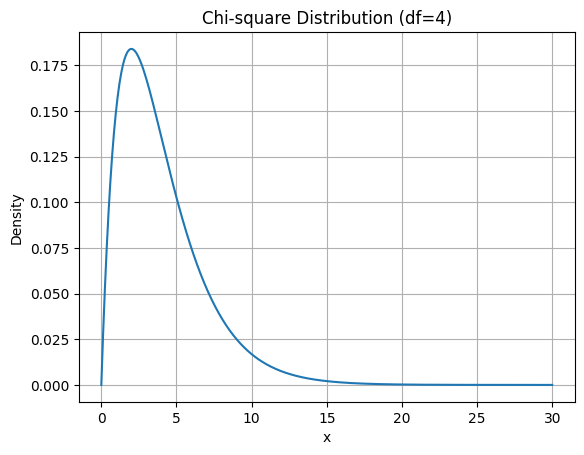

In [28]:
#15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics?

from scipy.stats import chi2

x = np.linspace(0, 30, 500)
plt.plot(x, chi2.pdf(x, df=4))
plt.title("Chi-square Distribution (df=4)")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [29]:
#16. Implement an F-test using Python to compare the variances of two random samples?

from scipy.stats import f

def f_test(sample1, sample2):
    f_stat = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
    dfn, dfd = len(sample1)-1, len(sample2)-1
    p_val = 1 - f.cdf(f_stat, dfn, dfd)
    print(f"F = {f_stat:.4f}, P = {p_val:.4f}")


In [30]:
f_test([1,2,3,4,5],[6,7,8,9,10])

F = 1.0000, P = 0.5000


In [31]:
#17 Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results?

from scipy.stats import f_oneway

g1 = np.random.normal(50, 5, 30)
g2 = np.random.normal(55, 5, 30)
g3 = np.random.normal(53, 5, 30)

f_stat, p = f_oneway(g1, g2, g3)
print(f"F = {f_stat:.4f}, P = {p:.4f}")


F = 8.6087, P = 0.0004


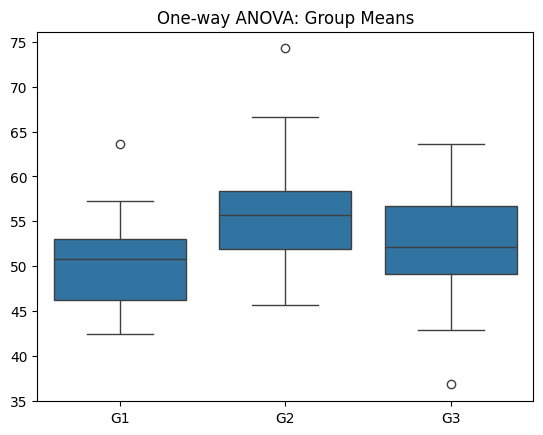

In [33]:
#18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results?

data = np.concatenate([g1, g2, g3])
groups = ['G1']*30 + ['G2']*30 + ['G3']*30
sns.boxplot(x=groups, y=data)
plt.title("One-way ANOVA: Group Means")
plt.show()


In [34]:
#19 Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA?

from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    for i, g in enumerate(groups):
        stat, p = shapiro(g)
        print(f"Group {i+1} Normality p = {p:.4f}")
    _, p = levene(*groups)
    print(f"Levene Test (Equal Variance) p = {p:.4f}")


In [35]:
check_anova_assumptions([1,2,3,4,5],[6,7,8,9,10])


Group 1 Normality p = 0.9672
Group 2 Normality p = 0.9672
Levene Test (Equal Variance) p = 1.0000


In [36]:
#20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results?

import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.DataFrame({
    'Score': np.random.normal(50, 5, 90),
    'A': ['A1']*30 + ['A2']*30 + ['A3']*30,
    'B': ['B1']*15 + ['B2']*15 + ['B1']*15 + ['B2']*15 + ['B1']*15 + ['B2']*15
})

model = ols('Score ~ C(A) * C(B)', data=df).fit()
anova = sm.stats.anova_lm(model, typ=2)
print(anova)


                sum_sq    df         F    PR(>F)
C(A)         54.152745   2.0  1.502182  0.228563
C(B)          1.933666   1.0  0.107279  0.744079
C(A):C(B)    13.591299   2.0  0.377019  0.687058
Residual   1514.074808  84.0       NaN       NaN


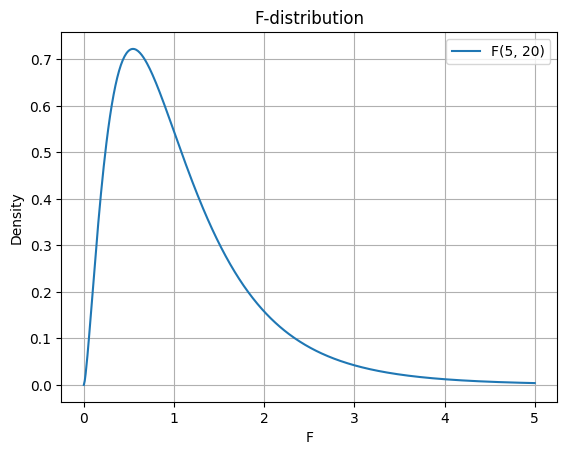

In [37]:
#21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing?

x = np.linspace(0, 5, 500)
plt.plot(x, f.pdf(x, 5, 20), label='F(5, 20)')
plt.title("F-distribution")
plt.xlabel("F")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


One-Way ANOVA Test:
  F-statistic = 40.9756
  P-value = 0.0000


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

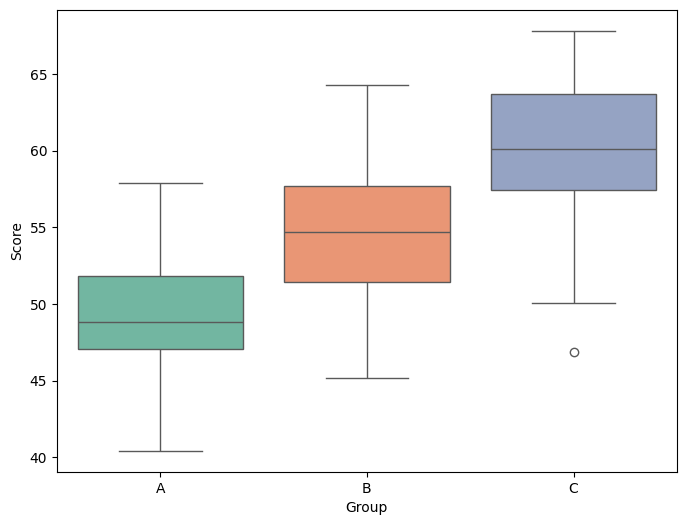

In [38]:
#22 Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means?

from scipy.stats import f_oneway

# Simulate data for 3 groups
np.random.seed(42)
group_a = np.random.normal(loc=50, scale=5, size=30)
group_b = np.random.normal(loc=55, scale=5, size=30)
group_c = np.random.normal(loc=60, scale=5, size=30)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(group_a, group_b, group_c)

print("One-Way ANOVA Test:")
print(f"  F-statistic = {f_stat:.4f}")
print(f"  P-value = {p_val:.4f}")

# Combine data for plotting
df = pd.DataFrame({
    'Score': np.concatenate([group_a, group_b, group_c]),
    'Group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Group', y='Score', palette="Set2")
plt.title


In [39]:
#23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means?

data = np.random.normal(100, 10, 40)
t_stat, p_val = ttest_1samp(data, 100)
print(f"T = {t_stat:.4f}, P = {p_val:.4f}")


T = 0.0151, P = 0.9880


In [40]:
#24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results?

sample = np.random.normal(100, 10, 30)
sample_var = np.var(sample, ddof=1)
chi2_stat = (len(sample)-1) * sample_var / 100  # Assuming population variance = 100
p_val = 1 - chi2.cdf(chi2_stat, df=len(sample)-1)
print(f"Chi2 = {chi2_stat:.4f}, P = {p_val:.4f}")


Chi2 = 25.3111, P = 0.6620


In [47]:
#25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups?

from statsmodels.stats.proportion import proportions_ztest

# Example: 2 groups - conversions and total samples
successes = np.array([45, 30])   # successes in group 1 and group 2
samples = np.array([100, 100])   # sample sizes in group 1 and group 2

z_stat, p_val = proportions_ztest(successes, samples)

print("Z-Test for Proportions:")
print(f"  Z-Statistic = {z_stat:.4f}")
print(f"  P-Value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject null hypothesis: Proportions are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference in proportions.")


Z-Test for Proportions:
  Z-Statistic = 2.1909
  P-Value = 0.0285
Reject null hypothesis: Proportions are significantly different.


F-Test for Variance Comparison:
  F-Statistic = 2.4082
  P-Value = 0.0209
Reject null hypothesis: Variances are significantly different.


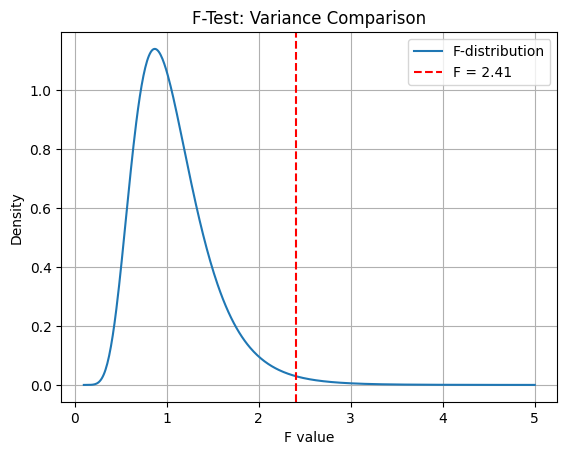

In [48]:
#26 Implement an F-test for comparing the variances of two datasets, then interpret and visualize the resultsD

from scipy.stats import f

# Simulated data
np.random.seed(42)
data1 = np.random.normal(loc=50, scale=10, size=30)
data2 = np.random.normal(loc=50, scale=15, size=30)

# Calculate sample variances
var1 = np.var(data1, ddof=1)
var2 = np.var(data2, ddof=1)

# F-statistic: larger variance / smaller variance
f_stat = var1 / var2 if var1 > var2 else var2 / var1
df1, df2 = len(data1)-1, len(data2)-1

# P-value (two-tailed)
p_val = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

print("F-Test for Variance Comparison:")
print(f"  F-Statistic = {f_stat:.4f}")
print(f"  P-Value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference in variances.")

# Visualize
x = np.linspace(0.1, 5, 500)
y = f.pdf(x, df1, df2)
plt.plot(x, y, label='F-distribution')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F = {f_stat:.2f}')
plt.title("F-Test: Variance Comparison")
plt.xlabel("F value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
#27 Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

from scipy.stats import chisquare

# Simulate observed frequencies for 5 categories
observed = np.array([20, 18, 22, 25, 15])

# Expected frequencies assuming uniform distribution
expected = np.array([sum(observed)/len(observed)] * len(observed))

# Perform Chi-square goodness-of-fit test
chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Goodness-of-Fit Test:")
print(f"  Chi-Square Statistic = {chi_stat:.4f}")
print(f"  P-Value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject null hypothesis: Observed does not fit expected distribution.")
else:
    print("Fail to reject null hypothesis: Observed fits the expected distribution.")


Chi-Square Goodness-of-Fit Test:
  Chi-Square Statistic = 2.9000
  P-Value = 0.5747
Fail to reject null hypothesis: Observed fits the expected distribution.
